<a href="https://colab.research.google.com/github/MagaliDrumare/Hugging-Face-Gradio-/blob/main/Image_generation_with%20HF%20%26%20Gradio_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L3: Image generation app 🎨

Load your HF API key and relevant Python libraries

In [23]:
pip install python-dotenv

In [30]:
pip install pybase64

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 2.0 MB/s eta 0:00:00


In [31]:
import os
import io
import IPython.display
from PIL import Image
import base64
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = 'XXXXXXXXXXXXXXXXXXXXXX'

In [50]:
# Helper function
import requests, json, base64

#Text-to-image endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL='https://api-inference.huggingface.co/models/runwayml/stable-diffusion-v1-5'):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    # Assuming the response is an image, decode it as base64
    return base64.b64encode(response.content).decode('utf-8')

## Building an image generation app

Here we are going to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library.


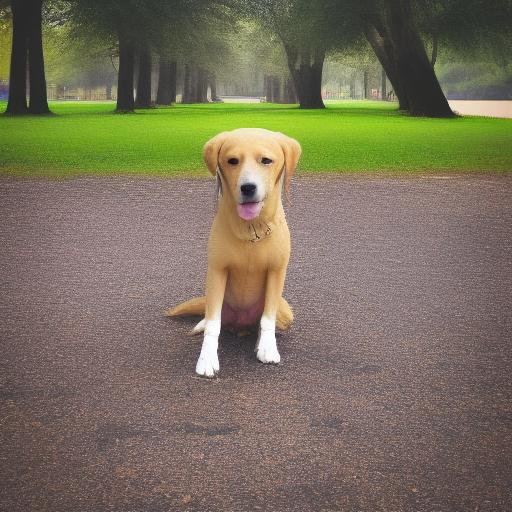

In [51]:
prompt = "a dog in a park"

result = get_completion(prompt)
IPython.display.HTML(f'<img src="data:image/png;base64,{result}" />')

In [38]:
#from google.colab import drive
#drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Generating with `gr.Interface()`

In [52]:
pip install gradio

In [73]:
import gradio as gr

#A helper function to convert the PIL image to base64
#so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt):
    output = get_completion(prompt)
    result_image = base64_to_pil(output)
    return result_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"])

demo.launch(share=True)

Closing server running on port: 7861
Closing server running on port: 7861
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7861
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c282926d1c0e001471.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [74]:
demo.close()

Closing server running on port: 7864
